### Linear Regression -- Single Variable

In [1]:
import os
import wget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/homeprices.csv'
filename = 'homeprices.csv'
if os.path.isfile(filename):
    print('file exists')
else:
    wget.download(url,filename)

file exists


In [3]:
df = pd.read_csv(filename)
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


<IPython.core.display.Javascript object>


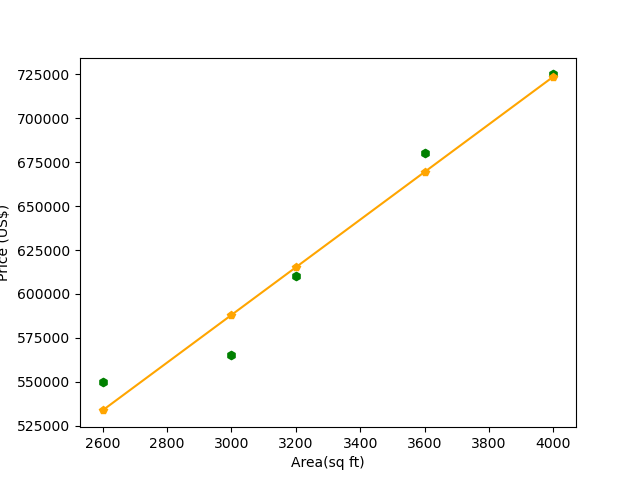

In [4]:
%matplotlib notebook
plt.xlabel('Area(sq ft)')
plt.ylabel('Price (US$)')
plt.scatter(df['area'], df['price'], color= 'green', marker='h')
plt.show()

In [5]:
lreg = linear_model.LinearRegression()

In [6]:
lreg.fit(df[['area']], df.price)

LinearRegression()

In [7]:
print(lreg.predict([[3300]]))
print(lreg.coef_)
print(lreg.intercept_)

[628715.75342466]
[135.78767123]
180616.43835616432


In [8]:
plt.plot(df['area'], lreg.predict(df[['area']]), color='orange', marker='p')

In [9]:
if os.path.isfile('areas.csv'):
    print('file exists')
else:
    wget.download('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/areas.csv')

file exists


In [10]:
df_predict = pd.read_csv('areas.csv')
df_predict

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [11]:
predicted_prices = lreg.predict(df_predict[['area']])

In [12]:
df_predict['prices'] = predicted_prices

In [13]:
df_predict.to_csv('predictions.csv', index=False)

### Exercise: Predict Canada's income per capita 

In [14]:
ex_file = 'canada_per_capita_income.csv'
if os.path.isfile(ex_file):
    print('file exists')
else:
    wget.download('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv')

file exists


In [15]:
df = pd.read_csv(ex_file)
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [16]:
df.rename(columns={'per capita income (US$)':'income'}, inplace=True)
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [17]:
lreg = linear_model.LinearRegression()
lreg.fit(df[['year']], df['income'])

LinearRegression()

In [18]:
lreg.predict([[2020]])

array([41288.69409442])

<IPython.core.display.Javascript object>


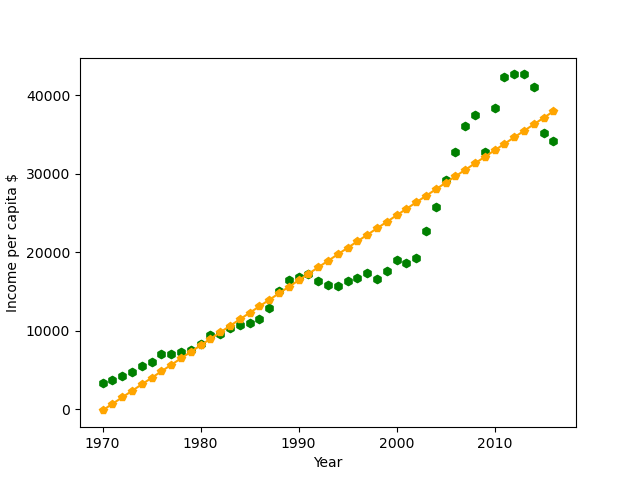

In [19]:
%matplotlib notebook
plt.xlabel('Year')
plt.ylabel('Income per capita $')
plt.scatter(df['year'], df['income'], color='green', marker = 'h')
plt.plot(df['year'], lreg.predict(df[['year']]), color ='orange', marker='p')